In [27]:
from integrators import RK4, RK4_timestepper, FE_timestepper
from tools import ScalarTool, VectorTool, create_grid, dt_cfl
from operators import OperatorKit
import numpy as np
import matplotlib.pyplot as plt
from copy import copy

import time

# Parameters
L = 1.0
N = 64
Pe = 100.0
kappa = 1.0/Pe
U=1.0

# Create tool box
st = ScalarTool(N,L)
vt = VectorTool(N,L)
okit = OperatorKit(N, L, kappa)

# Initial condition
X = create_grid(N, L)
th0 = np.sin((2.0 * np.pi / L) * X[0])

# Create operators: d th / dt = operator (th)
def lit_op(scalar):
    return okit.lit_energy_op(scalar,U)

def sin_op(scalar):
    return okit.sin_flow_op(scalar)

time = np.linspace(0,0.2,200)
th0 = RK4_timestepper(sin_op,th0,0.001)
th = RK4(lit_op,th0,time)


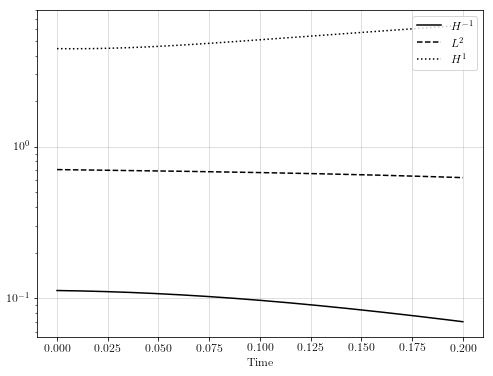

In [28]:
from post_processing import plot_norms, compute_norms

plt.figure(figsize = (8,6))

plot_norms(time,th,N,L,high_quality = True)
plt.show()

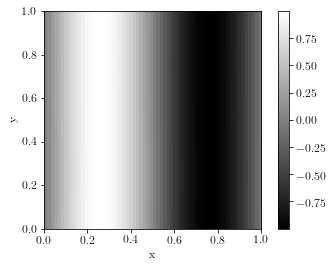

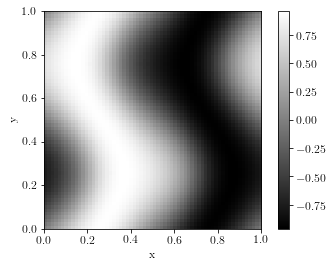

In [29]:
for i in range(len(th)):
    if i %100 == 0:
        st.plot(th[i])
        plt.show()

In [25]:
from integrators import RK4, RK4_timestepper, FE_timestepper
from tools import ScalarTool, VectorTool, create_grid, dt_cfl
from operators import OperatorKit
import numpy as np
import matplotlib.pyplot as plt
from copy import copy

# Parameters
L = 1.0
N = 64
Pe = 100.0
kappa = 1.0 / Pe
U = 1.0

# Create tool box
st = ScalarTool(N, L)
vt = VectorTool(N,L)
okit = OperatorKit(N, L, kappa)

# Initial condition
X = create_grid(N, L)
th0 = np.sin((2.0 * np.pi / L) * X[0])
th0_hat = st.fft(th0)

# Create operators: d th / dt = operator (th)
def lit_op_hat(scalar_hat):
    return okit.lit_energy_op_hat(scalar_hat, U)

def lit_op(scalar):
    return okit.lit_energy_op(scalar, U)

def sin_op_hat(scalar_hat):
    return okit.sin_flow_op_hat(scalar_hat)

def sin_op(scalar):
    return okit.sin_flow_op(scalar)

time = np.linspace(0, 0.02, 20)
th0 = RK4_timestepper(sin_op, th0, 0.001)
th_hist = RK4(lit_op, th0, time)

th0_hat = RK4_timestepper(sin_op_hat, th0_hat, 0.001)
th_hist_hat = RK4(lit_op_hat, th0_hat, time)
th2_hist = np.array([st.ifft(th_hat) for th_hat in th_hist_hat])
